# Linear Regression Model for Superstore

## 1. Importing libraries and data

#### Import the libraries you need into a new notebook, including any necessary modules from scikit-learn.

In [117]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [118]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [119]:
# path into a string 
path= r'C:\Users\Carolina\Documents\CareerFoundry\Data Immersion\Achievement 6- Advanced Analytics & Dashboard Design'

In [120]:
# Import dataset into Jupyter as df_st  
df_ss = pd.read_csv(os.path.join(path, '02-SS Data','Prepared Data','Superstore3.csv'))

#### Clean your data so that it’s ready for analysis.

In [121]:
# Check for null values
df_ss.isnull().sum()

Category         0
City             0
Country          0
Customer Name    0
Discount         0
Order Date       0
Order ID         0
Manufacturer     0
Product Name     0
Profit           0
Quantity         0
Region           0
Sales            0
Segment          0
Ship Date        0
Ship Mode        0
State            0
Sub-Category     0
type purchase    0
dtype: int64

In [122]:
# Check that there are no duplicates
dups = df_ss.duplicated()
dups.shape

(9993,)

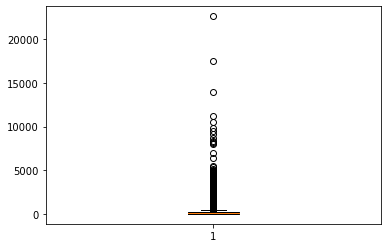

In [123]:
# Visual Ckeck for outliers 
plt.boxplot(df_ss["Sales"])
plt.show()

They are a lot of outliers(shown by the circles). However, as explored before, the data need to be seen by categories. 

<AxesSubplot:title={'center':'Sales'}, xlabel='Category'>

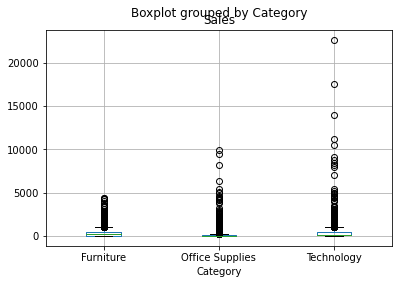

In [124]:
df_ss.boxplot(column='Sales', by='Category')

Technology is the category with the highest number of outliers followed by office supplies. As explained before, all the values correspond to correct data were some of the products have a very high price. <br> Depending on the accuracy of the regression model and how well it explains the variablility of the dependent variable, we will consider the posibility of removing them.For now, we will leave them as they are. 

## 2. Prepare data and implement linear regression model

In this exercise we will only do a regression model with one variable given that if we take the other variables, we will need to prove that they are not correlated and are linearly independent. This will be something to explore later. <br>For now let's us remember that profit is what we are trying to predict. Additionally, based on the results of exercise 6.2 we concluded that the variable that showed the strongest correlation was sales. Therefore our independent variable will be sales and the dependent, profit.  

In [125]:
# Let us normalize sales by sales per item per order. For this we need to create a new column.
df_ss['sales_per_order'] = df_ss['Sales']/df_ss['Quantity']

In [126]:
# Let us normalize  profit by profit per item in an order. For this we need to create another column.
df_ss['profit_per_order'] = df_ss['Profit']/df_ss['Quantity']

In [127]:
# Check if the 
df_ss.head()

Category             City        Country    Customer Name  Discount  \
0        Furniture        Henderson  United States      Claire Gute      0.00   
1        Furniture        Henderson  United States      Claire Gute      0.00   
2  Office Supplies      Los Angeles  United States  Darrin Van Huff      0.00   
3        Furniture  Fort Lauderdale  United States   Sean O'Donnell      0.45   
4  Office Supplies  Fort Lauderdale  United States   Sean O'Donnell      0.20   

   Order Date        Order ID Manufacturer  \
0  2017-11-08  CA-2017-152156         Bush   
1  2017-11-08  CA-2017-152156          Hon   
2  2017-06-12  CA-2017-138688    Universal   
3  2016-10-11  US-2016-108966     Bretford   
4  2016-10-11  US-2016-108966        Eldon   

                                        Product Name    Profit  ...  Region  \
0                  Bush Somerset Collection Bookcase   41.9136  ...   South   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  219.5820  ...   South   
2  Self-Adhesive Address Labels for Typewriters b...    6.8714  ...    West   
3      Bretford CR4500 Series Slim Rectangular Table -383.0310  ...   South   
4                     Eldon Fold 'N Roll Cart System    2.5164  ...   South   

      Sales    Segment   Ship Date       Ship Mode       State Sub-Category  \
0  261.9600   Consumer  2017-11-11    Second Class    Kentucky    Bookcases   
1  731.9400   Consumer  2017-11-11    Second Class    Kentucky       Chairs   
2   14.6200  Corporate  2017-06-16    Second Class  California       Labels   
3  957.5775   Consumer  2016-10-18  Standard Class     Florida       Tables   
4   22.3680   Consumer  2016-10-18  Standard Class     Florida      Storage   

  type purchase sales_per_order  profit_per_order  
0  Big purchase        130.9800           20.9568  
1  Big purchase        243.9800           73.1940  
2  Low purchase          7.3100            3.4357  
3  Big purchase        191.5155          -76.6062  
4  Low purchase         11.1840            1.2582  

[5 rows x 21 columns]

#### Explore your data visually (e.g., by way of a scatterplot), looking for variables whose relationship you’d like to test.

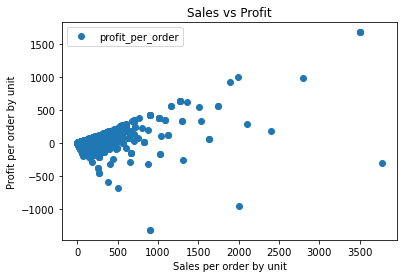

In [128]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_ss.plot(x = 'sales_per_order', y='profit_per_order',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Sales vs Profit')  
plt.xlabel('Sales per order by unit')  
plt.ylabel('Profit per order by unit')  
plt.show()

In [129]:
# Again let's make sure we have a moderate correlation between the two variables, which in fact is 0.5382.  
df_ss.corr()

Discount    Profit  Quantity     Sales  sales_per_order  \
Discount          1.000000 -0.219481  0.008680 -0.028197        -0.032844   
Profit           -0.219481  1.000000  0.066241  0.479067         0.468330   
Quantity          0.008680  0.066241  1.000000  0.200808        -0.003104   
Sales            -0.028197  0.479067  0.200808  1.000000         0.889386   
sales_per_order  -0.032844  0.468330 -0.003104  0.889386         1.000000   
profit_per_order -0.232302  0.912199 -0.007229  0.447323         0.538241   

                  profit_per_order  
Discount                 -0.232302  
Profit                    0.912199  
Quantity                 -0.007229  
Sales                     0.447323  
sales_per_order           0.538241  
profit_per_order          1.000000

<AxesSubplot:>

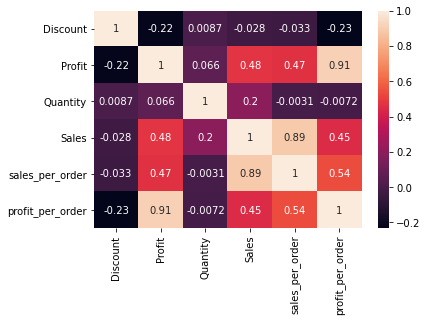

In [130]:
sns.heatmap(df_ss.corr(),annot=True)

#### State your hypothesis in a markdown cell within your Jupyter notebook.

<b>  Hypothesis: Could profit be predicted by sales  for the category technology? 

Let us create the subset for testing our hyphothesis on the category of technology. 

In [131]:
df_technology= df_ss[df_ss['Category']=='Technology']

In [132]:
df_technology.describe()

Discount       Profit     Quantity         Sales  sales_per_order  \
count  1847.000000  1847.000000  1847.000000   1847.000000      1847.000000   
mean      0.132323    78.752002     3.756903    452.709276       120.389355   
std       0.141575   428.816633     2.216828   1108.655848       251.429447   
min       0.000000 -6599.978000     1.000000      0.990000         0.792000   
25%       0.000000     5.203650     2.000000     68.016000        20.994000   
50%       0.200000    25.018200     3.000000    166.160000        53.592000   
75%       0.200000    74.894600     5.000000    448.534000       125.990000   
max       0.700000  8399.976000    14.000000  22638.480000      3773.080000   

       profit_per_order  
count       1847.000000  
mean          20.993948  
std          105.388422  
min        -1319.995600  
25%            1.954400  
50%            7.559400  
75%           22.158600  
max         1679.995200

In [133]:
df_technology.shape

(1847, 21)

#### Reshape the variables into NumPy arrays, with X being the independent variable and y being the dependent variable.

In [134]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_technology['sales_per_order'].values.reshape(-1,1)
y = df_technology['profit_per_order'].values.reshape(-1,1)

#### Split the data into two sets: a training set and a test set.

In [135]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#### Run a linear regression on the data.

In [136]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [137]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [138]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

#### Create a plot that shows the regression line on the test set.

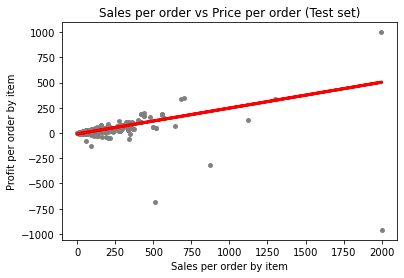

In [139]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Sales per order vs Price per order (Test set)')
plot_test.xlabel('Sales per order by item')
plot_test.ylabel('Profit per order by item')
plot_test.show()

#### Write your own interpretation of how well the line appears to fit the data in a markdown cell.

The line seems to be covering most of the points that are sales per item less than $500. We can see a couple of outliers who are very distant from the line.  

In [140]:
regression.coef_

array([[0.2564416]])

We can say about this coefficient that by every dollar spent by customers in the category of technology, 25.64 cents will go to profit. 

In [141]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

#### Check the model performance statistics—MSE and R2.

In [142]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.2564416]]
Mean squared error:  6614.116283610078
R2 score:  -0.07694116159143194


The results shows that almost none of the variability is being explained by the model.  

#### Compare the predicted y values with the actual y values in a dataframe.

In [143]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

Actual  Predicted
0   -3.9980  -5.521138
1    7.7995  22.379708
2   -2.3382  -6.957211
3    5.0372  -5.931445
4    2.2002  -7.246477
5    5.2500  -3.211112
6   15.6792  30.585839
7    7.5192   9.660204
8    2.2828  -7.370595
9   54.3966  31.405939
10   8.7989  10.890611
11  36.7173  25.251341
12   8.6855  -3.477811
13  -2.1133  -3.428575
14  13.4376   4.736013
15  15.5990  22.379708
16  26.3172  14.480794
17   0.6798  -2.648992
18  -4.1382  -4.905678
19   7.5192   9.660204
20   7.4997  41.664116
21   4.9975  -4.495885
22   2.2302  -6.354060
23  31.4975  22.686925
24  26.0415  10.164882
25  -7.9000   6.584957
26   7.5579  -0.392819
27   4.1391  -0.187153
28  -5.0589  -2.545903
29   1.4392  -5.931445

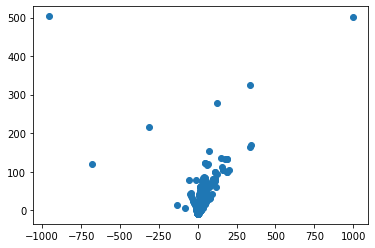

In [144]:
# Compare through a scatter plot the actual and predicted values of y.

plt.scatter(y_test, y_predicted)

This reinforce the fact how poorly the model predicts the behavior of profit per order by item. 

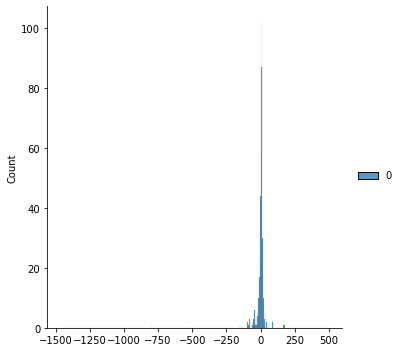

In [145]:
# Visually see the distribution of the residuals (y_test-y_predicted) which is the difference between 
# the actual data point and the estimated by the model.
sns.displot((y_test-y_predicted))

Because the residuals are not normally distrited one could say linear regression is not the most adequate model to predict the behavior of profit.

### Re-run the model using the train dataset

In [146]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [147]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [148]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.2564416]]
Mean squared error:  8186.88621822853
R2 score:  0.38080035470777385


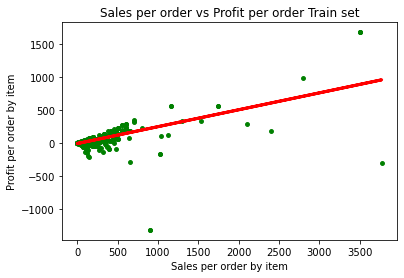

In [149]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Sales per order vs Profit per order Train set')
plot_test.xlabel('Sales per order by item')
plot_test.ylabel('Profit per order by item')
plot_test.show()

The new result, shows an important improvement, 38% of the profit variability is being explained. Still is not very good.  

## 3. Improving the model by removing outliers

For improving our model let us remove the orders with profit per order below -250 and above 1000. 

In [150]:
#Create a subset without the values that are outliers.
df_no_outliers = df_technology[(df_technology['profit_per_order']>(-250))]
df_no_outliers = df_no_outliers[(df_no_outliers['profit_per_order']<1000)]

In [151]:
# Check that the max and minimum values are ok
df_no_outliers.describe()

Discount       Profit     Quantity         Sales  sales_per_order  \
count  1837.000000  1837.000000  1837.000000   1837.000000      1837.000000   
mean      0.130811    78.989120     3.756124    408.677602       110.098591   
std       0.138927   252.426764     2.220761    778.631226       185.454403   
min       0.000000 -1359.992000     1.000000      0.990000         0.792000   
25%       0.000000     5.500000     2.000000     67.960000        20.970000   
50%       0.200000    25.060000     3.000000    164.990000        52.792000   
75%       0.200000    74.814200     5.000000    444.768000       124.792000   
max       0.700000  3919.988800    14.000000  11199.968000      2799.992000   

       profit_per_order  
count       1837.000000  
mean          21.185990  
std           61.234945  
min         -214.570000  
25%            1.999600  
50%            7.559400  
75%           21.999000  
max          997.995000

In [152]:
df_no_outliers.shape

(1837, 21)

Only 10 outliers were removed which is very small amount (less than 1%).

In [153]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X1 = df_no_outliers['sales_per_order'].values.reshape(-1,1)
y1 = df_no_outliers['profit_per_order'].values.reshape(-1,1)                                                        

In [154]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=0)

In [155]:
# Create a regression object.

regression2 = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [156]:
regression2.fit(X_train, y_train)

LinearRegression()

In [157]:
# Predict the values of y using X.

y_predicted = regression2.predict(X_test)

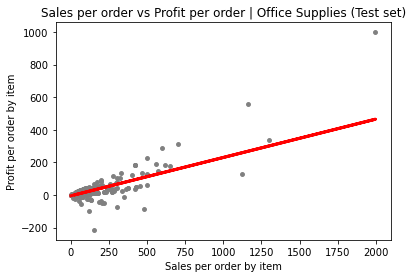

In [158]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Sales per order vs Profit per order | Office Supplies (Test set)')
plot_test.xlabel('Sales per order by item')
plot_test.ylabel('Profit per order by item')
plot_test.show()

In [159]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [160]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.2564416]]
Mean squared error:  1409.926318855087
R2 score:  0.6364205878955054


In [161]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

Actual   Predicted
0     8.3973    1.446063
1    13.1956    1.630097
2    12.5860    5.150739
3     4.3995   -0.497351
4  -214.5700   29.802299
5    48.9231   55.169284
6    17.4965    6.336838
7     5.4392    7.372792
8     2.2002   -3.247500
9    28.7964   13.396951
10   37.4071   24.928468
11    4.1391    3.230859
12    6.6555    8.494879
13  -24.7188   23.658589
14   15.5990   23.940523
15    0.7794   -2.370634
16    7.6194   18.480703
17  148.1974  128.712123
18   31.4975   24.222457
19    0.5994   -3.546849
20   30.5964   14.573636
21   -0.7295   -2.680808
22    7.5492   -0.492644
23   53.9973   32.224388
24   15.5990   23.940523
25   42.0186   32.605164
26   -4.4793    3.942519
27   36.8520   18.011911
28   -1.8186   -2.982040
29    2.8188   -3.140186

The model did improve as the coefficient of correlation is 64%. However, let's bear in mind that the dataset is not that big(close to 1800) and the outliers are not innacurate data. 

In [162]:
#Export data 
df_ss.to_csv((os.path.join(path, '02-SS Data','Prepared Data','Superstore4.csv')), index=False)